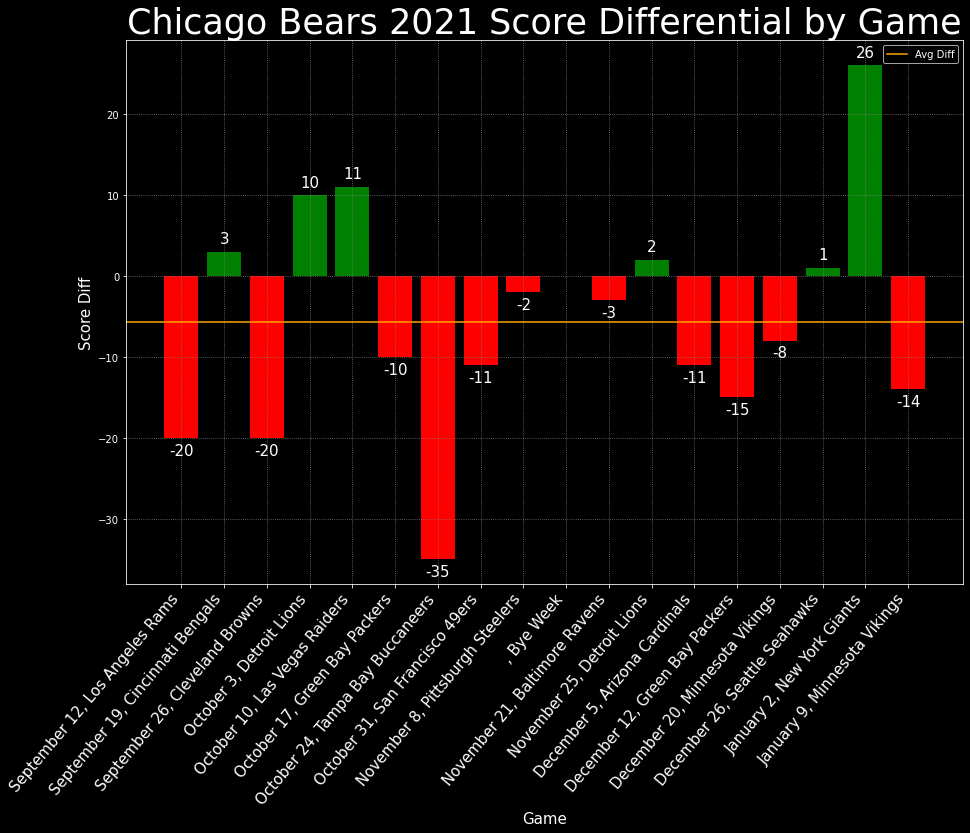

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# configure pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# data munge
df = pd.read_csv("data.csv", header=1)
df = df[["Week", "Date", "Opp", "Tm", "Opp.1"]].rename({"Opp.1":"op_score", "Tm":"tm_score"}, axis=1)
df['score_diff'] = df.tm_score - df.op_score
df["win"] = df.score_diff > 0
df["game"] = df.Date.fillna("") + ", " +df.Opp

# generate viz
plt.style.use('dark_background')
x = df.game
y = df.score_diff
fig, ax = plt.subplots(figsize=(15,10))
bars = ax.bar(x, y, color=["#FF0000" if s < 0 else "#008000" for s in df.score_diff])

ax.set_xlabel('Game', fontsize=15)
ax.set_ylabel('Score Diff', fontsize=15)
ax.set_title('Chicago Bears 2021 Score Differential by Game', fontsize=35)


ax.bar_label(bars, padding=5, fontsize=15)
ax.axhline(df.score_diff.mean(), c="orange", label="Avg Diff")

plt.xticks(rotation=50, ha="right", fontsize=15)
plt.grid(c="grey", linestyle=":")
plt.legend()
plt.show()